In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [14]:
data= pd.read_excel(r'c:\Users\sivae\Downloads\iris (1).xls')

In [15]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
data.shape

(150, 5)

In [18]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [25]:
data.isna().sum()



SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [26]:
data.dtypes


SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [27]:
for i in ['SL', 'SW','PL']:
    data[i]=data[i].fillna(data[i].median())

In [28]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [29]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


In [30]:
#preprocessing

In [31]:
data.mean()

SL    5.853333
SW    3.047333
PL    3.780000
PW    1.198667
dtype: float64

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

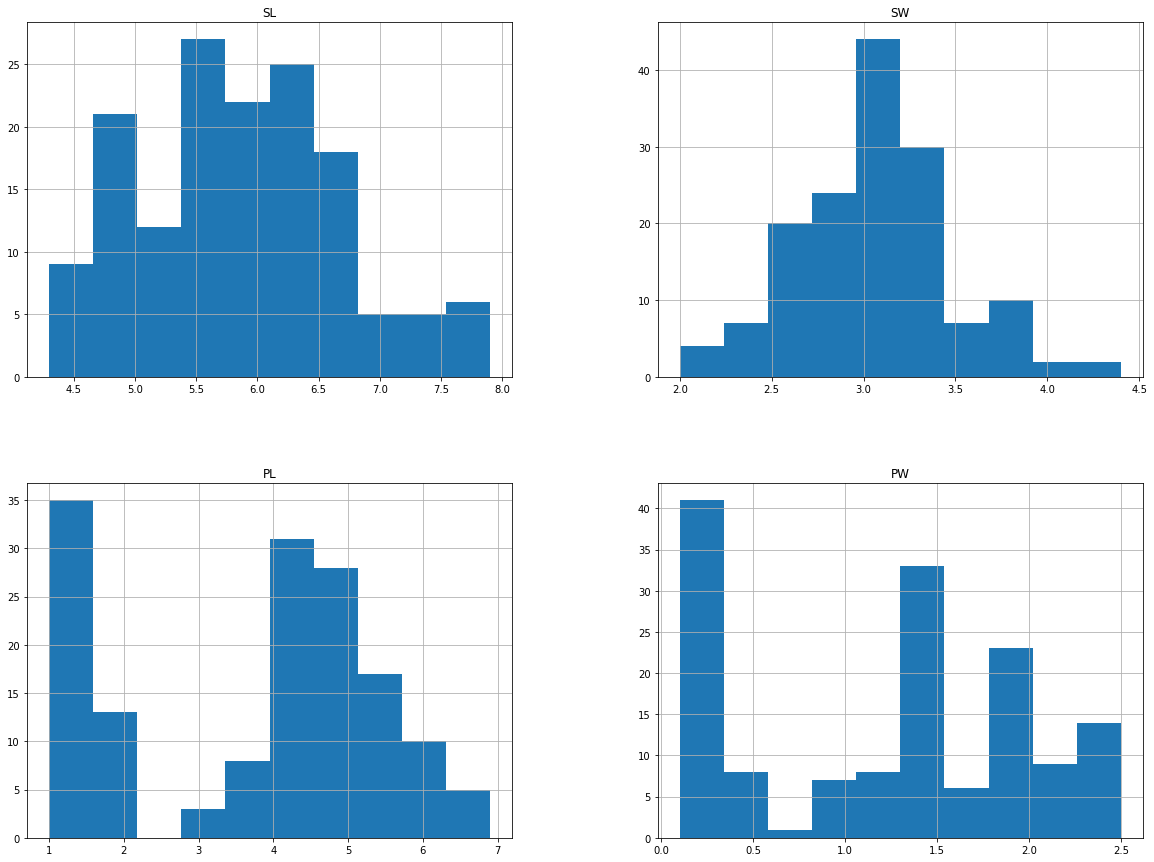

In [32]:
data.hist(figsize=(20,15))


In [33]:
#out liers in data

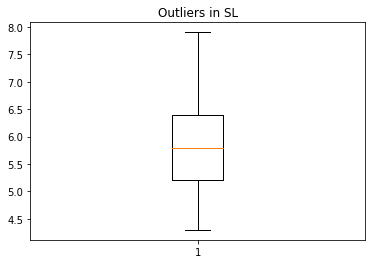

In [34]:
plt.boxplot(data['SL'])
plt.title('Outliers in SL')
plt.show()

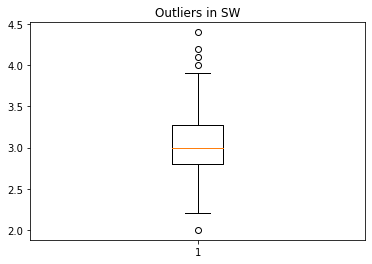

In [35]:
plt.boxplot(data['SW'])
plt.title('Outliers in SW')
plt.show()

In [38]:
Q1 = np.percentile(data['SW'],25, interpolation = 'midpoint')
Q2 = np.percentile(data['SW'],50, interpolation = 'midpoint')
Q3 = np.percentile(data['SW'],75, interpolation = 'midpoint')

In [39]:
print('Q1 = ', Q1)
print('Q2 = ', Q2)
print('Q3 = ', Q3)

Q1 =  2.8
Q2 =  3.0
Q3 =  3.25


In [40]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print('lower limit=',low_lim)
print('upper limt=',up_lim)

lower limit= 2.1249999999999996
upper limt= 3.9250000000000003


In [43]:
outlier=[]
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
        
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [46]:
ind1=data['SW']>up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [47]:
data.drop(data.loc[ind1].index)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


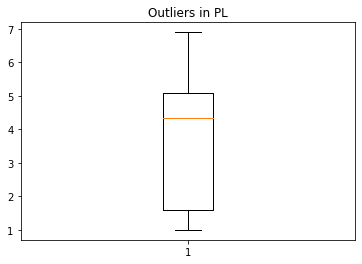

In [36]:
plt.boxplot(data['PL'])
plt.title('Outliers in PL')
plt.show()

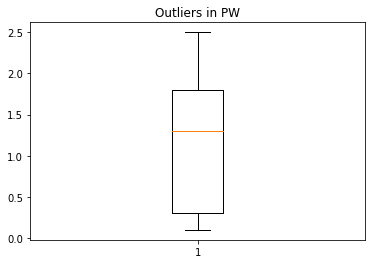

In [37]:
plt.boxplot(data['PW'])
plt.title('Outliers in PW')
plt.show()

In [48]:
#Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [49]:
x=data.drop('Classification',axis=1)
y=data['Classification']

In [50]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [51]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Classification, Length: 150, dtype: object

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [54]:
x_train.shape

(105, 4)

In [55]:
y_train.shape

(105,)

In [56]:
y_train.head()

81     Iris-versicolor
133     Iris-virginica
137     Iris-virginica
75     Iris-versicolor
109     Iris-virginica
Name: Classification, dtype: object

In [57]:
##Logistic Regression

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score 

In [61]:
print('accuracy is :',accuracy_score(y_test,y_pred))
print('precision is :',precision_score(y_test,y_pred,average='micro'))
print('recall is :',recall_score(y_test,y_pred,average='micro'))
print('f1 is :',f1_score(y_test,y_pred,average='micro'))

accuracy is : 0.9777777777777777
precision is : 0.9777777777777777
recall is : 0.9777777777777777
f1 is : 0.9777777777777777


In [62]:
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [63]:
#KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
    

In [65]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')  
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [66]:
print('accuracy is :',accuracy_score(y_test,y_pred))
print('precision is :',precision_score(y_test,y_pred,average='micro'))
print('recall is :',recall_score(y_test,y_pred,average='micro'))
print('f1 is :',f1_score(y_test,y_pred,average='micro'))

accuracy is : 0.9555555555555556
precision is : 0.9555555555555556
recall is : 0.9555555555555556
f1 is : 0.9555555555555556


In [67]:
confusion_matrix(y_test,y_pred)

array([[18,  1,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

In [68]:
#decision tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print('Accuracy on Decision tree model is :',accuracy_score(y_test,y_pred))

Accuracy on Decision tree model is : 1.0


In [70]:
y_test.value_counts()

Iris-setosa        19
Iris-versicolor    13
Iris-virginica     13
Name: Classification, dtype: int64

In [71]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [72]:
#support vector mechine

In [73]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
print('Accuracy using linear svm is :',accuracy_score(y_test,y_pred))

Accuracy using linear svm is : 1.0


In [74]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [75]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)
print('Accuracy is :',accuracy_score(y_test,y_pred))

Accuracy is : 0.9777777777777777


In [76]:
#random forest classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print('accuracy is :',accuracy_score(y_test,y_pred))
print('f1 is :',f1_score(y_test,y_pred,average='micro'))

accuracy is : 1.0
f1 is : 1.0


In [78]:
rft=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion='entropy')
rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)
print('accuracy is :',accuracy_score(y_test,y_pred))
print('f1 is :',f1_score(y_test,y_pred,average='micro'))

accuracy is : 1.0
f1 is : 1.0
